## Plot from xarray

Xarray provides a wrapper around matplotlib to allow for simple visualisation. This section will explore some basic visualisation options, but the [Xarray User Guide on Plotting](https://docs.xarray.dev/en/stable/user-guide/plotting.html#plotting) contains many more examples of interesting and useful plots. 

First, set up the Cecil client and load the dataset of interest. This notebook will use Planet's [Forest Carbon Monitoring](https://docs.cecil.earth/Forest-Carbon-Monitoring-111ef16bbbe4817aa1a8dce6d9216665) dataset to demonstrate the plotting methods below, but you can change the data request id below to load one of your own datasets and run the notebook yourself. 

In [1]:
import cecil
import xarray

client = cecil.Client()
ds = client.load_xarray('c572bb90-84b8-42f1-884a-94f83acb6a5b')
ds

<xarray.Dataset> Size: 27MB
Dimensions:                                                  (x: 439, y: 361,
                                                              time: 14)
Coordinates:
  * x                                                        (x) float64 4kB ...
  * y                                                        (y) float64 3kB ...
    spatial_ref                                              int64 8B 0
  * time                                                     (time) datetime64[ns] 112B ...
Data variables:
    canopy_cover_uncertainty_lower_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover_uncertainty_upper_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover                                             (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density                          (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_lower_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_upper_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_lower_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_upper_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height                                            (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
Attributes:
    provider_name:    Planet
    dataset_id:       4d8bd6ba-b751-4c46-8e70-5000e6d8b212
    dataset_name:     Forest Carbon Monitoring
    dataset_crs:      EPSG:4326
    aoi_id:           7dbbf7c3-0447-45a7-8849-e031c6099c1c
    data_request_id:  c572bb90-84b8-42f1-884a-94f83acb6a5b

### Continuous plot

The simplest plot can be achieved by filtering the dataset to get a single 2D array (i.e. a single variable for a single timestep) and then plotting using the built in `.plot()` function.

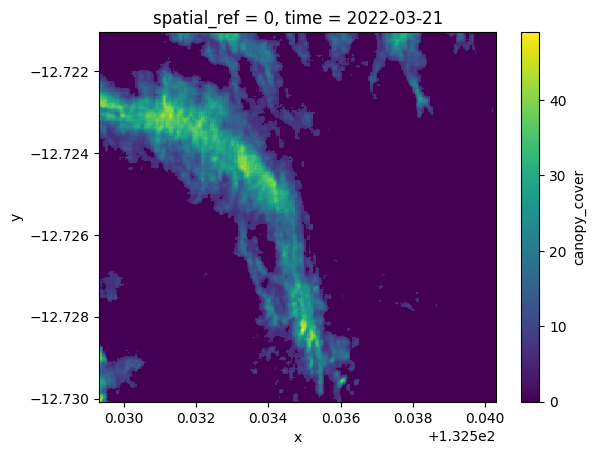

In [2]:
canopy_cover_q2_2022 = ds['canopy_cover'].sel(time='2022-03-21')
canopy_cover_q2_2022.plot()

The default plots can be adjusted further by passing in matplotlib arguments. Some commonly used ones include:

- `cmap`: Specify a colormap of interest. Some colormaps included with matplotlib are listed [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html#colormap-reference).
- `vmin` and `vmax`: Specify the upper and lower limits for plotting the values.

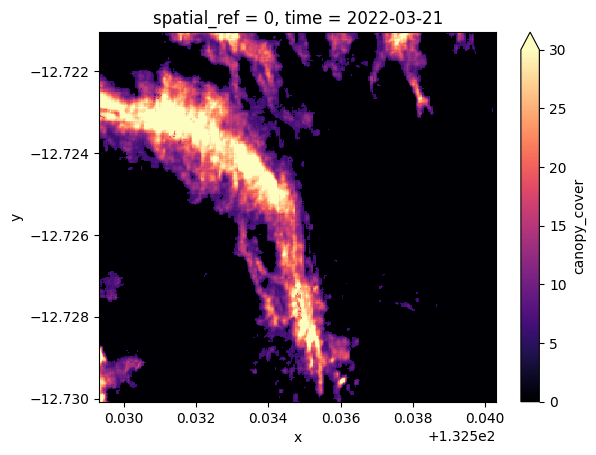

In [3]:
canopy_cover_q2_2022.plot(cmap='magma', vmin=0, vmax=30)

### Discrete plot

If you want to plot discrete categories rather than continuous pixel values, you can use the parameter `levels` to specify where category boundaries should be defined. 

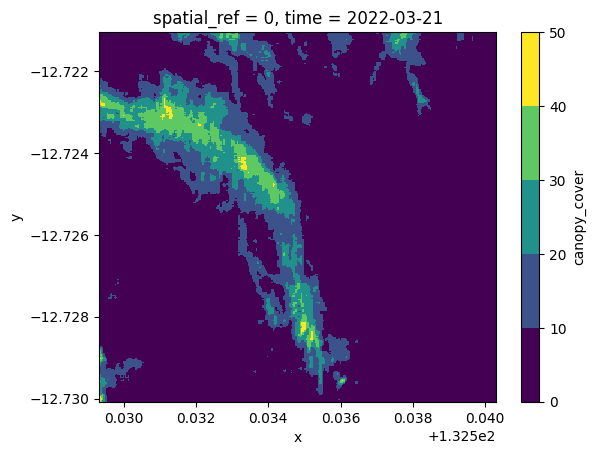

In [4]:
canopy_cover_q2_2022.plot(levels=[0, 10, 20, 30, 40, 50])

### Faceted plots

To plot many timesteps at once, you can create faceted plots:

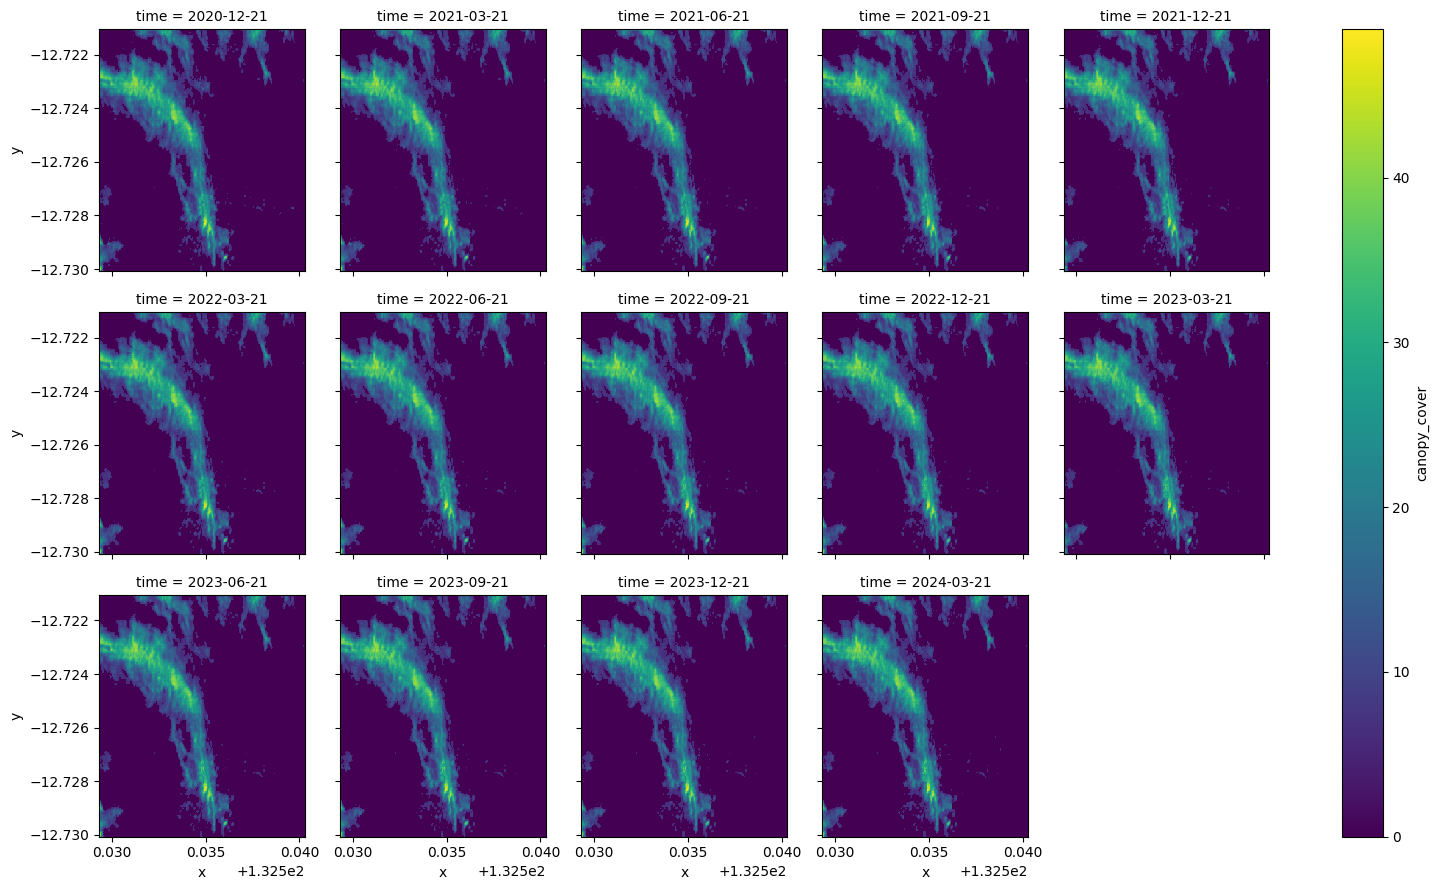

In [5]:
canopy_cover = ds['canopy_cover']
canopy_cover.plot(x="x", y="y", col="time", col_wrap=5)

### Scatter plots

At the dataset level, it is possible to compare variables to each other on a scatter plot. In the following example, we look at the relationship between canopy cover and aboveground live carbon density, and then color the points based on their canopy height.

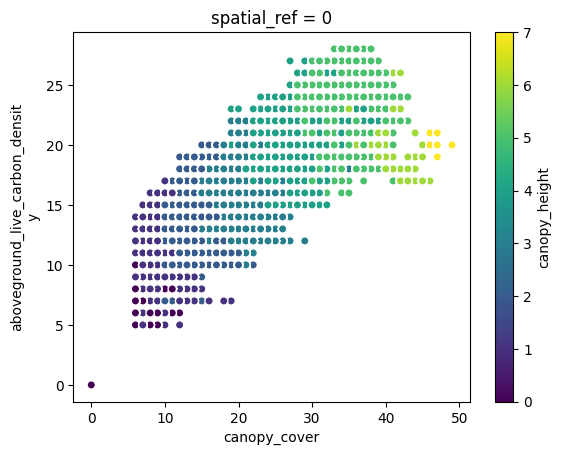

In [6]:
ds.plot.scatter(x='canopy_cover', y='aboveground_live_carbon_density', hue='canopy_height')

### Timeseries

Xarray also makes it simple to plot a timeseries chart. To view the pixel-level variation through time, select one pixel and then the `.plot()` function will generate a timeseries chart by default. 

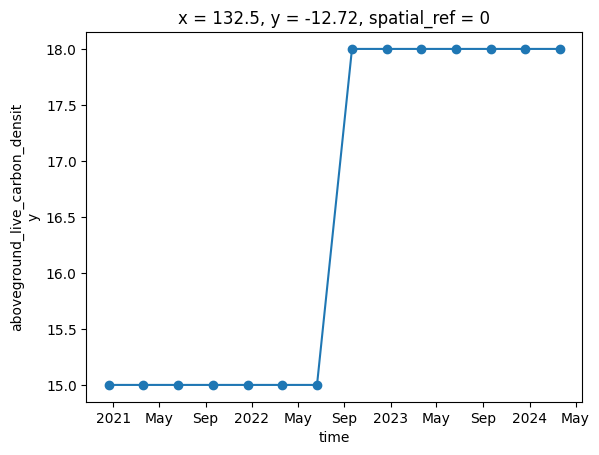

In [7]:
aboveground_live_carbon_density_1d = ds['aboveground_live_carbon_density'].isel(x=50, y=60)
aboveground_live_carbon_density_1d.plot(marker='o')

To look at the change over time for the entire AOI, we can calculate the average aboveground live carbon density across the x and y dimensions and then plot the timeseries.

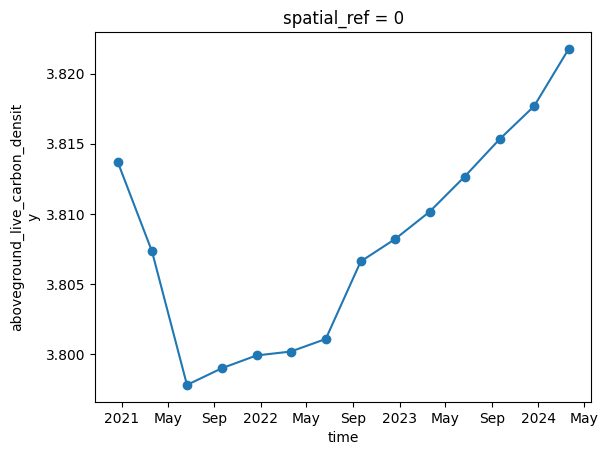

In [8]:
aboveground_live_carbon_density_avg = ds['aboveground_live_carbon_density'].mean(dim=['x', 'y'])
aboveground_live_carbon_density_avg.plot(marker='o')